<a href="https://colab.research.google.com/github/sophieaea/node_test1/blob/main/Line_image_20230916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # 필요한 라이브러리 설치
  !pip install pydrive

  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  import numpy as np
  import cv2
  from matplotlib import pyplot as plt

  # Google Drive 인증
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # 이미지 생성 및 그라데이션 적용 함수
  def create_graded_line(angle, img_size=(100, 100), gradient_width=3):
      # 빈 이미지 생성
      img = np.ones((img_size[0], img_size[1]), dtype=np.float32) * 255

      # 기울기를 이용하여 직선의 방정식을 얻는다.
      radian = np.deg2rad(angle)
      tan_angle = np.tan(radian)

      for x in range(img_size[1]):
          y = int(tan_angle * (x - img_size[1]/2) + img_size[0]/2)
          if 0 <= y < img_size[0]:
              # 그라데이션 적용
              for offset in range(-gradient_width, gradient_width+1):
                  if 0 <= y + offset < img_size[0]:
                      intensity = 255 * abs(offset) / gradient_width
                      img[y+offset, x] = intensity

      return img


  def save_to_drive(img, filename, folder_id):
      # 일시적으로 이미지 저장
      cv2.imwrite(filename, img)

      # 저장한 이미지를 구글 드라이브에 업로드
      file = drive.CreateFile({
          'title': filename,
          'parents': [{'id': folder_id}]
      })
      file.SetContentFile(filename)
      file.Upload()

      # 로컬에서 일시 저장한 이미지 삭제
      import os
      os.remove(filename)


  # 메인 코드
  folder_id = '1yOtvIDU5XIXuXaUhfL2n2Xo_Bsc9UtRj'
  for angle in range(0, 20, 1): # 1도 단위로 이미지 생성
      img = create_graded_line(angle)
      filename = f"line_{angle}.png"
      save_to_drive(img, filename, folder_id)


IndentationError: ignored

In [ ]:
# 필요한 라이브러리 설치
!pip install pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# Google Drive 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def create_graded_line(angle_degrees, img_size=100):
    # 빈 이미지 생성
    img = np.ones((img_size, img_size)) * 255
    img = np.uint8(img)

    intersections = get_intersection_points(angle_degrees, img_size)
    if len(intersections) != 2:
        print("올바르지 않은 교차점입니다.")
        return img

    start, end = intersections

    # OpenCV의 line 함수로 직선을 그립니다.
    cv2.line(img, (int(start[0]), int(start[1])), (int(end[0]), int(end[1])), (0, 0, 0), 1)

    return img

def get_intersection_points(angle_degrees, img_size=100):
    # 각도를 라디안으로 변환
    angle_radians = np.deg2rad(angle_degrees)

    # 탄젠트 값 계산
    tan_value = np.tan(angle_radians)

    # 교차점 리스트 초기화
    intersections = []

    # 위쪽 가장자리와의 교차점 계산
    x_top = img_size / 2 - (img_size / 2) / tan_value
    if 0 <= x_top <= img_size:
        intersections.append((x_top, img_size))

    # 아래쪽 가장자리와의 교차점 계산
    x_bottom = img_size / 2 + (img_size / 2) / tan_value
    if 0 <= x_bottom <= img_size:
        intersections.append((x_bottom, 0))

    # 왼쪽 가장자리와의 교차점 계산
    y_left = img_size / 2 - img_size / 2 * tan_value
    if 0 <= y_left <= img_size:
        intersections.append((0, y_left))

    # 오른쪽 가장자리와의 교차점 계산
    y_right = img_size / 2 + img_size / 2 * tan_value
    if 0 <= y_right <= img_size:
        intersections.append((img_size, y_right))

    return intersections

def draw_line(angle_degrees, img_size=100):
    intersections = get_intersection_points(angle_degrees, img_size)
    if len(intersections) != 2:
        print("올바르지 않은 교차점입니다.")
        return

    start, end = intersections

    # 여기에서 color='black'을 추가하여 직선의 색상을 검정으로 설정
    plt.plot([start[0], end[0]], [start[1], end[1]], label=f'{angle_degrees}°', color='black')
    #plt.legend()
    plt.tight_layout()  # 여백 제거
    plt.axis('off')  # 축 제거

    plt.xlim(0, img_size)
    plt.ylim(0, img_size)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis()  # 이미지 좌표계와 일치시키기 위해 y축을 뒤집습니다.
     # 서브플롯의 여백을 0으로 조정
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

def save_to_drive(img, filename, folder_id):
    # 일시적으로 이미지 저장
    cv2.imwrite(filename, img)

    # 저장한 이미지를 구글 드라이브에 업로드
    file = drive.CreateFile({
        'title': filename,
        'parents': [{'id': folder_id}]
    })
    file.SetContentFile(filename)
    file.Upload()

    # 로컬에서 일시 저장한 이미지 삭제
    import os
    os.remove(filename)

# 메인 코드
folder_id = '1yOtvIDU5XIXuXaUhfL2n2Xo_Bsc9UtRj'
for angle in range(0, 20, 1): # 1도 단위로 이미지 생성
    img = create_graded_line(angle)
    filename = f"line_{angle}.png"
    save_to_drive(img, filename, folder_id)


<ipython-input-2-10cdd1eced1a>:47: RuntimeWarning: divide by zero encountered in double_scalars
  x_top = img_size / 2 - (img_size / 2) / tan_value
<ipython-input-2-10cdd1eced1a>:52: RuntimeWarning: divide by zero encountered in double_scalars
  x_bottom = img_size / 2 + (img_size / 2) / tan_value


In [ ]:
# 필요한 라이브러리 설치
!pip install pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Google Drive 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 이미지 생성 및 그라데이션 적용 함수
def create_graded_line(angle, img_size=(1000, 1000), gradient_width=3):
    # 빈 이미지 생성
    img = np.ones((img_size[0], img_size[1]), dtype=np.float32) * 255

    # 기울기를 이용하여 직선의 방정식을 얻는다.
    radian = np.deg2rad(angle)
    tan_angle = np.tan(radian)

    for x in range(img_size[1]):
        y = int(tan_angle * (x - img_size[1]/2) + img_size[0]/2)
        if 0 <= y < img_size[0]:
            # 그라데이션 적용
            for offset_y in range(-gradient_width, gradient_width+1):
                for offset_x in range(-gradient_width, gradient_width+1):
                    if 0 <= y + offset_y < img_size[0] and 0 <= x + offset_x < img_size[1]:
                        distance = np.sqrt(offset_x**2 + offset_y**2)
                        if distance <= gradient_width:
                            intensity = 255 * distance / gradient_width
                            img[y+offset_y, x+offset_x] = min(img[y+offset_y, x+offset_x], intensity)

    return img

def save_to_drive(img, filename, folder_id):
    # 일시적으로 이미지 저장
    cv2.imwrite(filename, img)

    # 저장한 이미지를 구글 드라이브에 업로드
    file = drive.CreateFile({
        'title': filename,
        'parents': [{'id': folder_id}]
    })
    file.SetContentFile(filename)
    file.Upload()

    # 로컬에서 일시 저장한 이미지 삭제
    import os
    os.remove(filename)

# 메인 코드
folder_id = '1yOtvIDU5XIXuXaUhfL2n2Xo_Bsc9UtRj'
for angle in range(0, 20, 1): # 1도 단위로 이미지 생성
    img = create_graded_line(angle)
    filename = f"line_{angle}.png"
    save_to_drive(img, filename, folder_id)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

def get_intersection_points(angle_degrees, img_size=100):
    # 각도를 라디안으로 변환
    angle_radians = np.deg2rad(angle_degrees)

    # 탄젠트 값 계산
    tan_value = np.tan(angle_radians)

    # 교차점 리스트 초기화
    intersections = []

    # 위쪽 가장자리와의 교차점 계산
    x_top = img_size / 2 - (img_size / 2) / tan_value
    if 0 <= x_top <= img_size:
        intersections.append((x_top, img_size))

    # 아래쪽 가장자리와의 교차점 계산
    x_bottom = img_size / 2 + (img_size / 2) / tan_value
    if 0 <= x_bottom <= img_size:
        intersections.append((x_bottom, 0))

    # 왼쪽 가장자리와의 교차점 계산
    y_left = img_size / 2 - img_size / 2 * tan_value
    if 0 <= y_left <= img_size:
        intersections.append((0, y_left))

    # 오른쪽 가장자리와의 교차점 계산
    y_right = img_size / 2 + img_size / 2 * tan_value
    if 0 <= y_right <= img_size:
        intersections.append((img_size, y_right))

    return intersections

def draw_line(angle_degrees, img_size=100):
    intersections = get_intersection_points(angle_degrees, img_size)
    if len(intersections) != 2:
        print("올바르지 않은 교차점입니다.")
        return

    start, end = intersections

def save_image_to_drive(img, filename, folder_id):
    # 일시적으로 이미지 저장
    plt.savefig(filename)

    # 저장한 이미지를 구글 드라이브에 업로드
    file = drive.CreateFile({
        'title': filename,
        'parents': [{'id': folder_id}]
    })
    file.SetContentFile(filename)
    file.Upload()

    # 로컬에서 일시 저장한 이미지 삭제
    os.remove(filename)

def draw_and_save_line(angle_degrees, img_size=100, folder_id=None):
    draw_line(angle_degrees, img_size)

    if folder_id:
        filename = f"line_{angle_degrees}.png"
        save_image_to_drive(None, filename, folder_id)

# Google Drive 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_id = '1yOtvIDU5XIXuXaUhfL2n2Xo_Bsc9UtRj'  # Google Drive 폴더 ID를 여기에 입력하세요.

for angle in range(-90, 91, 1):  # -90도부터 90도까지 1도 간격으로 직선 이미지 생성 및 저장
    draw_and_save_line(angle, img_size=100, folder_id=folder_id)


올바르지 않은 교차점입니다.


KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import matplotlib.pyplot as plt

def apply_median_blur(img_path, kernel_size):
    # 이미지 불러오기
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # BGR에서 RGB로 변환
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 미디언 블러 적용
    blurred = cv2.medianBlur(img, kernel_size)

    return blurred

# 이미지 경로와 블러링 크기를 지정
img_path = "A.png"
kernel_size = 5

blurred_img = apply_median_blur(img_path, kernel_size)

# 원본 이미지와 블러링된 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img)
plt.title('Median Blurred Image')

plt.show()


error: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


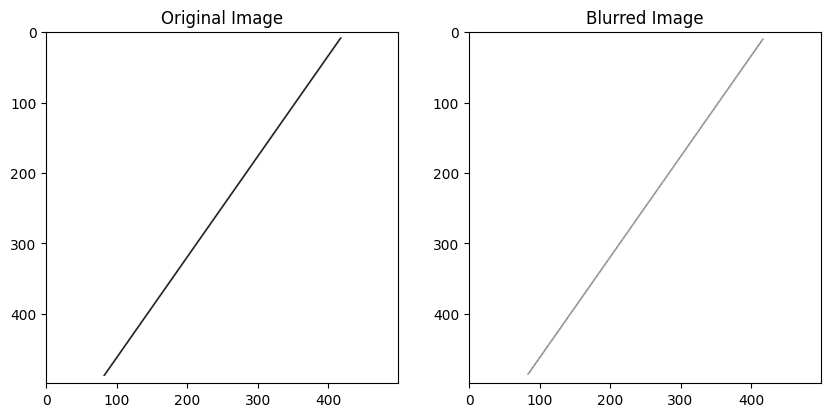

In [ ]:
import cv2
import matplotlib.pyplot as plt



url = "https://drive.google.com/file/d/1pQl3WW-5e47O9_-WHTb741MpLwglDjNZ/view?usp=drive_link"
file_id = url.split("/file/d/")[1].split("/view")[0]

from google.colab import drive
import requests
import io
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/drive')

def download_file_from_google_drive(file_id):
    URL = "https://drive.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params={'id': file_id}, stream=True)
    token = None
    for key, value in response.cookies.items():
        if key.startswith("download_warning"):
            token = value
    if token:
        params = {'id': file_id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    return img

def download_file_from_google_drive(file_id):
    URL = "https://drive.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params={'id': file_id}, stream=True)
    token = None
    for key, value in response.cookies.items():
        if key.startswith("download_warning"):
            token = value
    if token:
        params = {'id': file_id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)

    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    if img is None:
        print("Image download failed!")
        return None
    return img

img = download_file_from_google_drive(file_id)
if img is not None:
    blurred_img = apply_median_blur(img, 5)
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
    plt.title("Blurred Image")

    plt.show()
else:
    print("Image could not be retrieved.")


uint8 (499, 500, 4)


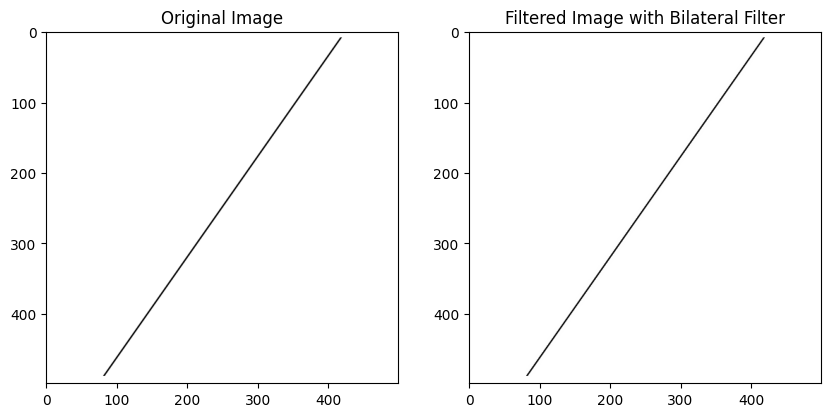

In [ ]:
# 이미지의 데이터 유형과 채널 수를 확인합니다.
print(img.dtype, img.shape)

# 이미지가 float 유형인 경우 8-bit로 변환합니다.
if img.dtype != np.uint8:
    img = (img * 255).astype(np.uint8)

# 이미지가 4 채널인 경우(예: RGBA), 3 채널로 변환합니다.
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

filtered_img = apply_bilateral_filter(img, d, sigma_color, sigma_space)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image with Bilateral Filter")

plt.show()


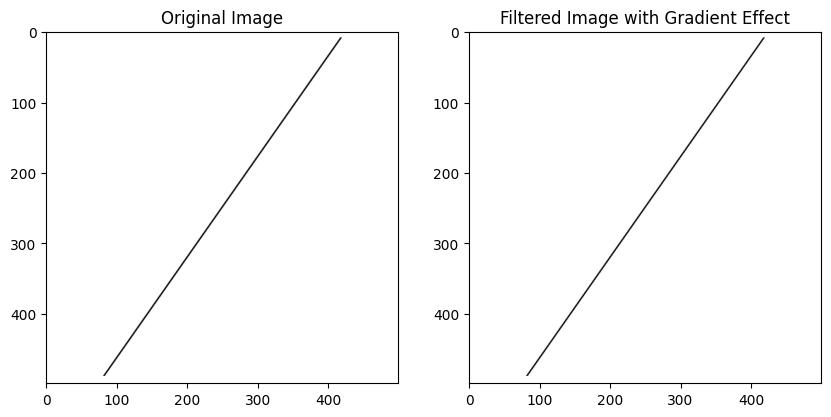

In [ ]:
import numpy as np

img = download_file_from_google_drive(file_id)

def apply_gradient_filter(img, filter_type='bilateral', padding_size=50):
    # 이미지에 패딩 추가
    padded_img = cv2.copyMakeBorder(img, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_REFLECT)

    # 필터링 적용
    if filter_type == 'bilateral':
        d = 15
        sigma_color = 75
        sigma_space = 75
        smoothed_img = cv2.bilateralFilter(padded_img, d, sigma_color, sigma_space)
    elif filter_type == 'gaussian':
        kernel_size = (15, 15)
        sigma = 0
        smoothed_img = cv2.GaussianBlur(padded_img, kernel_size, sigma)
    else:
        raise ValueError("Unknown filter type")

    # 원래 이미지 크기로 잘라내기
    height, width, channels = img.shape
    cropped_img = smoothed_img[padding_size:padding_size+height, padding_size:padding_size+width, :]

    return cropped_img

filtered_img = apply_gradient_filter(img)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image with Gradient Effect")

plt.show()


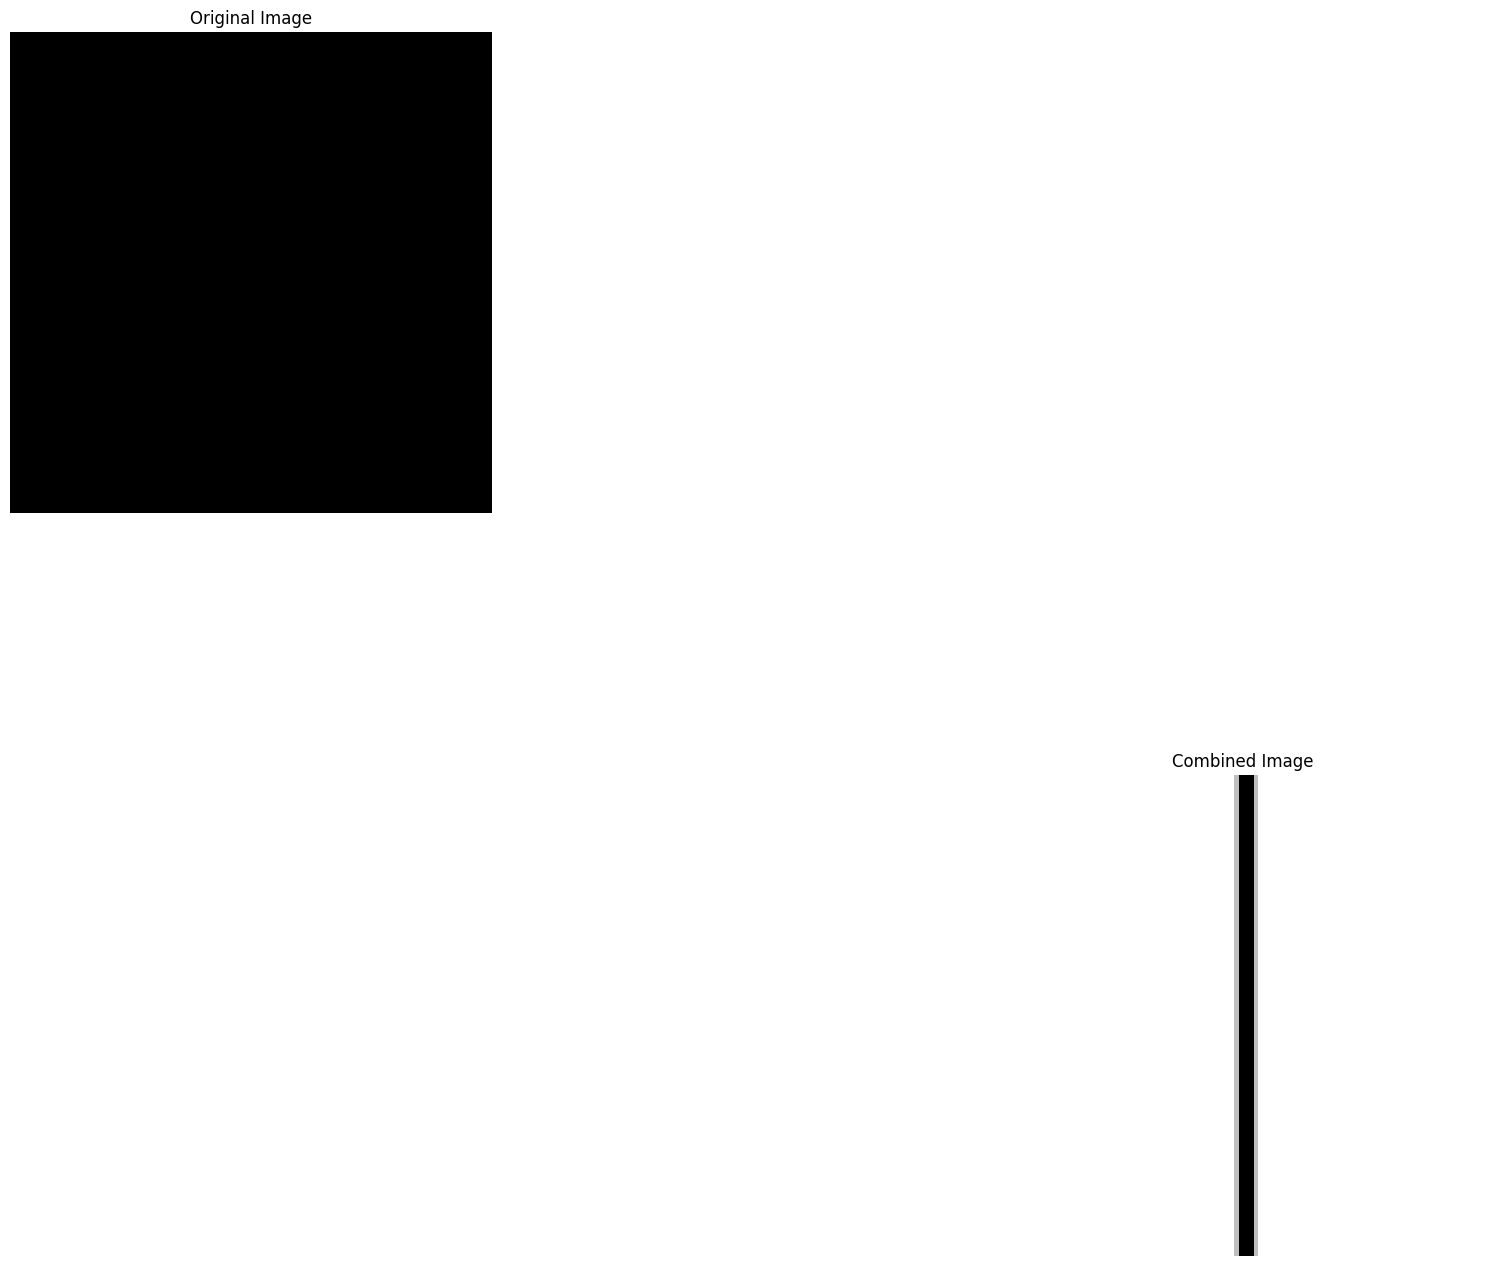

In [ ]:
!pip install pydrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 폴더 생성
folder_name = "gaussian_blurred_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# 중심에 직선 그리기
def draw_center_line(img):
    h, w = img.shape[:2]
    line_img = img.copy()
    cv2.line(line_img, (w//2, 0), (w//2, h), (0, 0, 0), 2)
    return line_img

# 이미지의 중심에 검은 직선 그리기
image_with_line = draw_center_line(image)

# `image_with_line`에 가우시안 블러 적용
gaussian_blurred_1 = cv2.GaussianBlur(image_with_line, (3, 5),0)
gaussian_blurred_2 = cv2.GaussianBlur(image_with_line, (3, 3), 1)
gaussian_blurred_3 = cv2.GaussianBlur(image_with_line, (5, 5), 0)
gaussian_blurred_4 = cv2.GaussianBlur(image_with_line, (7, 7), 0)
gaussian_blurred_5 = cv2.GaussianBlur(image_with_line, (9, 9), 0)

# 필터링된 이미지에 다시 원본 직선 그리기
gaussian_blurred_1 = draw_center_line(gaussian_blurred_1)
gaussian_blurred_2 = draw_center_line(gaussian_blurred_2)
gaussian_blurred_3 = draw_center_line(gaussian_blurred_3)
gaussian_blurred_4 = draw_center_line(gaussian_blurred_4)
gaussian_blurred_5 = draw_center_line(gaussian_blurred_5)

# 각 이미지를 폴더에 저장
cv2.imwrite(os.path.join(folder_name, 'gaussian_blurred_1.jpg'), gaussian_blurred_1)
cv2.imwrite(os.path.join(folder_name, 'gaussian_blurred_2.jpg'), gaussian_blurred_2)
cv2.imwrite(os.path.join(folder_name, 'gaussian_blurred_3.jpg'), gaussian_blurred_3)
cv2.imwrite(os.path.join(folder_name, 'gaussian_blurred_4.jpg'), gaussian_blurred_4)
cv2.imwrite(os.path.join(folder_name, 'gaussian_blurred_5.jpg'), gaussian_blurred_5)

# 모든 이미지를 겹치기
combined_image = np.maximum.reduce([gaussian_blurred_1, gaussian_blurred_2, gaussian_blurred_3, gaussian_blurred_4, gaussian_blurred_5])

# 플롯
plt.figure(figsize=(20, 15))

plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# ... [다른 이미지 플롯]

plt.subplot(2, 4, 7)
plt.imshow(combined_image, cmap='gray')
plt.title("Combined Image")
plt.axis('off')

plt.tight_layout()
plt.show()


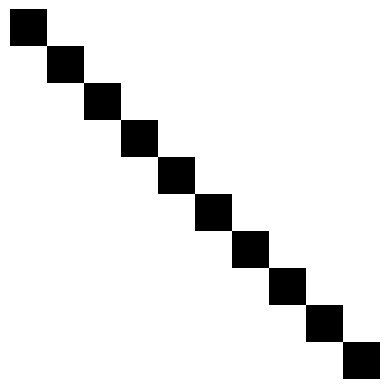

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 10x10 픽셀 이미지를 흰색(255)으로 초기화
image = np.ones((10, 10, 3)) * 255

# 대각선 픽셀을 검정색(0)으로 색칠
for i in range(10):
    image[i, i] = [0, 0, 0]

# 결과 이미지 표시
plt.imshow(image.astype(np.uint8))
plt.axis('off')
plt.show()


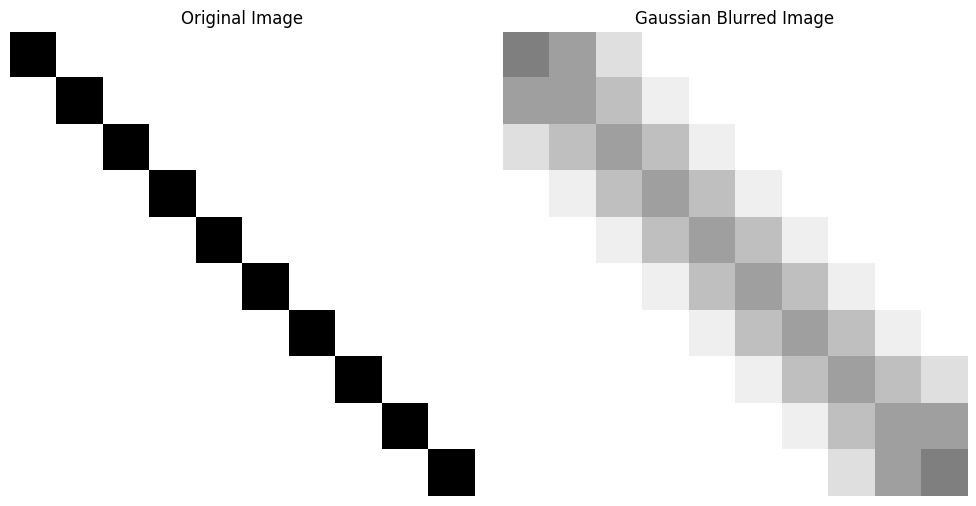

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 10x10 픽셀 이미지를 흰색(255)으로 초기화
image = np.ones((10, 10, 3)) * 255

# 대각선 픽셀을 검정색(0)으로 색칠
for i in range(10):
    image[i, i] = [0, 0, 0]

# 가우시안 필터링 적용
gaussian_blurred = cv2.GaussianBlur(image, (3, 3), 0)

# 결과 이미지 표시
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image.astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_blurred.astype(np.uint8))
plt.title("Gaussian Blurred Image")
plt.axis('off')

plt.tight_layout()
plt.show()


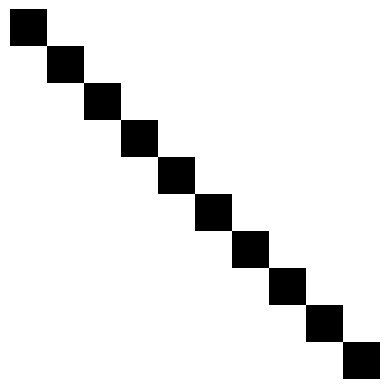

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 10x10 픽셀 이미지를 흰색(255)으로 초기화
image = np.ones((10, 10, 3)) * 255

# 이미지에 대각선 그리는 함수
def draw_diagonal_line(img):
    img_copy = img.copy()
    for i in range(10):
        img_copy[i, i] = [0, 0, 0]
    return img_copy

# 원본 이미지에 대각선 그리기
image_with_line = draw_diagonal_line(image)

# Bilateral Filtering 적용
filtered_image = cv2.bilateralFilter(image_with_line.astype(np.uint8), d=5, sigmaColor=75, sigmaSpace=75)

# 필터링된 이미지 위에 원본 직선 다시 그리기
final_image = filtered_image.copy()
for i in range(10):
    final_image[i, i] = [0, 0, 0]

# 결과 이미지 표시
plt.imshow(final_image)
plt.axis('off')
plt.show()
